In [1]:
import pandas as pd
import matplotlib.pyplot as mpp
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb

In [5]:
dataFrame = pd.read_csv('archive/Assessment_pemsis.csv')
dataFrame.head(10)

Timestamp        nama  jajan  kuota
0  15/02/2021 08:46:25        arik  10000     10
1  15/02/2021 08:51:22       HASAN  12500     15
2  15/02/2021 08:51:55         RGH  50000     20
3  15/02/2021 08:52:09  RIZALDI RF  15000      5
4  15/02/2021 08:53:51         ALI  10000     30
5  15/02/2021 09:01:05        NNPU  10000     30
6  15/02/2021 08:59:59         YSF  20000     17
7  15/02/2021 08:58:19        FPAP  10000     12
8  15/02/2021 09:06:48          AM  25000     12
9  15/02/2021 08:58:42         INY  20000     20

## PREPROCESSING

In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  42 non-null     object
 1   nama       42 non-null     object
 2   jajan      42 non-null     int64 
 3   kuota      42 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [17]:
x = dataFrame.drop(columns=['Timestamp','nama'], axis=1)
dataFrame.head(10)

Timestamp        nama  jajan  kuota
0  15/02/2021 08:46:25        arik  10000     10
1  15/02/2021 08:51:22       HASAN  12500     15
2  15/02/2021 08:51:55         RGH  50000     20
3  15/02/2021 08:52:09  RIZALDI RF  15000      5
4  15/02/2021 08:53:51         ALI  10000     30
5  15/02/2021 09:01:05        NNPU  10000     30
6  15/02/2021 08:59:59         YSF  20000     17
7  15/02/2021 08:58:19        FPAP  10000     12
8  15/02/2021 09:06:48          AM  25000     12
9  15/02/2021 08:58:42         INY  20000     20

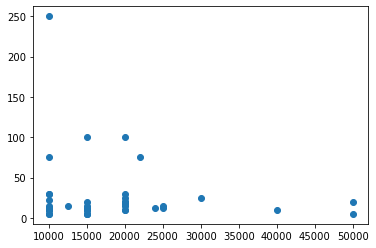

In [22]:
fig, ax = mpp.subplots()
mpp.scatter(x['jajan'], x['kuota'])

In [23]:
clusters = []
for i in range(1,12):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

Text(0, 0.5, 'inertia')

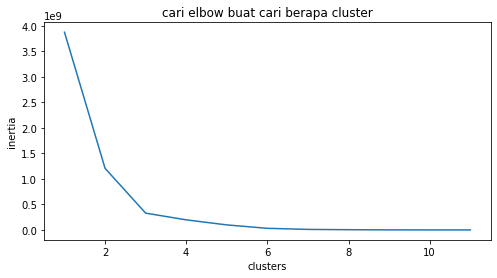

In [27]:
fig,ax = mpp.subplots(figsize = (8,4))
sb.lineplot(x=list(range(1,12)),y=clusters, ax = ax)
ax.set_title("cari elbow buat cari berapa cluster")
ax.set_xlabel("clusters")
ax.set_ylabel("inertia")

ketahuan disini elbownyaa bisa 3 ataupun 4, ntar atur aja mau berapa, ntar masukin ke nilai cluster aja kao mau coba coba

## Train data

In [25]:
km = KMeans(n_clusters=4).fit(x)
x['Labels'] = km.labels_

Text(0.5, 1.0, 'KMeans dengan 3 Cluster')

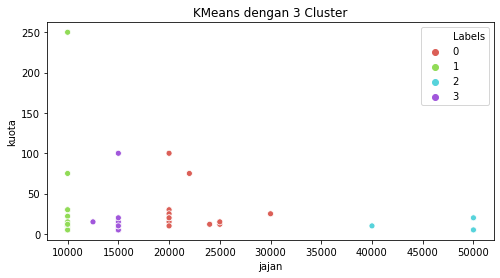

In [26]:
mpp.figure(figsize=(8,4))
sb.scatterplot(x['jajan'], x['kuota'], hue=x['Labels'],
                palette=sb.color_palette('hls', 4))
mpp.title('KMeans dengan 3 Cluster')